In [1]:
# from datetime import timedelta
import tropycal.tracks as tracks
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np


In [2]:
basin = tracks.TrackDataset(basin='north_atlantic',source='hurdat',include_btk=False)
season = basin.get_season(2017)
print(season)
season.to_dataframe()
season.summary()

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (2.05 seconds)
<tropycal.tracks.Season>
Season Summary:
    Total Storms:      18
    Named Storms:      17
    Hurricanes:        10
    Major Hurricanes:  6
    Season ACE:        224.8

More Information:
    year:          2017
    basin:         north_atlantic
    source_basin:  north_atlantic
    source:        hurdat
    source_info:   NHC Hurricane Database


{'id': ['AL012017',
  'AL022017',
  'AL032017',
  'AL042017',
  'AL052017',
  'AL062017',
  'AL072017',
  'AL082017',
  'AL092017',
  'AL112017',
  'AL122017',
  'AL132017',
  'AL142017',
  'AL152017',
  'AL162017',
  'AL172017',
  'AL182017',
  'AL192017'],
 'operational_id': ['AL012017',
  'AL022017',
  'AL032017',
  'AL042017',
  'AL052017',
  'AL062017',
  'AL072017',
  'AL082017',
  'AL092017',
  'AL112017',
  'AL122017',
  'AL132017',
  'AL142017',
  'AL152017',
  'AL162017',
  'AL172017',
  'AL182017',
  'AL192017'],
 'name': ['ARLENE',
  'BRET',
  'CINDY',
  'FOUR',
  'DON',
  'EMILY',
  'FRANKLIN',
  'GERT',
  'HARVEY',
  'IRMA',
  'JOSE',
  'KATIA',
  'LEE',
  'MARIA',
  'NATE',
  'OPHELIA',
  'PHILIPPE',
  'RINA'],
 'max_wspd': [45,
  45,
  50,
  25,
  45,
  50,
  75,
  95,
  115,
  155,
  135,
  90,
  100,
  150,
  80,
  100,
  35,
  50],
 'min_mslp': [990,
  1007,
  991,
  1009,
  1005,
  1001,
  981,
  962,
  937,
  914,
  938,
  972,
  962,
  908,
  981,
  959,
  1000,
 

In [7]:
season_df = season.to_dataframe()
storm_names = season_df['name'].tolist() #List of storm names

RI=[]

# Loop over each year from 2001 to 2021
for year in range(2001, 2002):
    # Get the season data for the current year
    season = basin.get_season(year)
    season_df = season.to_dataframe()

    # Extract the list of storm names
    storm_names = season_df['name'].tolist()
    for k in range(0,len(storm_names)):
        print(storm_names[k], year)
        if storm_names[k] != 'UNNAMED':
            storm = basin.get_storm((storm_names[k], year))  #Loop to find each storm name
            time = storm['time']
            vmax = storm['vmax']
            lat = storm['lat']
            lon = storm['lon']
            data = {'time':time,'vmax': vmax,'lat':lat,'lon':lon}
            df = pd.DataFrame(data)

            for i in range(0, len(df)-4):
                window24hr = [df['vmax'][i+1] - df['vmax'][i], df['vmax'][i+2] - df['vmax'][i], df['vmax'][i+3] - df['vmax'][i], df['vmax'][i+4] - df['vmax'][i]]
                #print(df['vmax'][i+1] - df['vmax'][i], df['vmax'][i+2] - df['vmax'][i], df['vmax'][i+3] - df['vmax'][i], df['vmax'][i+4] - df['vmax'][i])

                idx = np.argmax(window24hr)
                max_24 = window24hr[idx]
         

                idx_list = [i+1, i+2, i+3, i+4]
                j = idx_list[idx]

                if max_24 >= 30:
                    RI.append((storm_names[k], df['time'][i], df['time'][j],max_24, lat[i], lon[i]))

        RI_df = pd.DataFrame(RI,columns=['storm','Start Time','End Time', 'Vmax Change','lat','lon'])
print(RI_df)


ALLISON 2001
UNNAMED 2001
BARRY 2001
CHANTAL 2001
DEAN 2001
ERIN 2001
FELIX 2001
GABRIELLE 2001
UNNAMED 2001
HUMBERTO 2001
IRIS 2001
JERRY 2001
KAREN 2001
LORENZO 2001
MICHELLE 2001
NOEL 2001
OLGA 2001
       storm          Start Time            End Time  Vmax Change   lat   lon
0       DEAN 2001-08-26 12:00:00 2001-08-27 12:00:00           30  35.2 -65.5
1       DEAN 2001-08-26 18:00:00 2001-08-27 18:00:00           30  35.5 -65.0
2       ERIN 2001-09-08 00:00:00 2001-09-09 00:00:00           40  26.0 -58.3
3       ERIN 2001-09-08 06:00:00 2001-09-09 06:00:00           50  26.5 -58.8
4       ERIN 2001-09-08 12:00:00 2001-09-09 12:00:00           50  27.2 -59.2
5       ERIN 2001-09-08 18:00:00 2001-09-09 18:00:00           45  28.4 -59.8
6       ERIN 2001-09-09 00:00:00 2001-09-09 18:00:00           30  29.7 -60.4
7      FELIX 2001-09-12 06:00:00 2001-09-13 06:00:00           30  21.0 -48.8
8      FELIX 2001-09-12 12:00:00 2001-09-13 12:00:00           30  22.0 -48.9
9      FELIX 2001-

/glade/derecho/scratch/mingge/tmp/ipykernel_21245/2629650276.py:41: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.7, pad=0.02, cmap = 'RdYlGn')


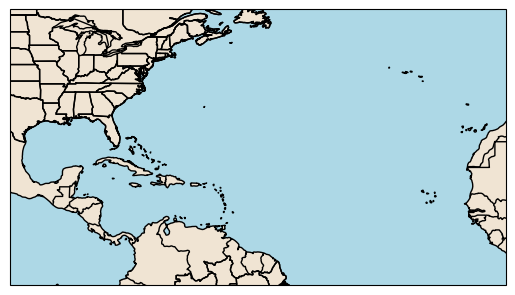

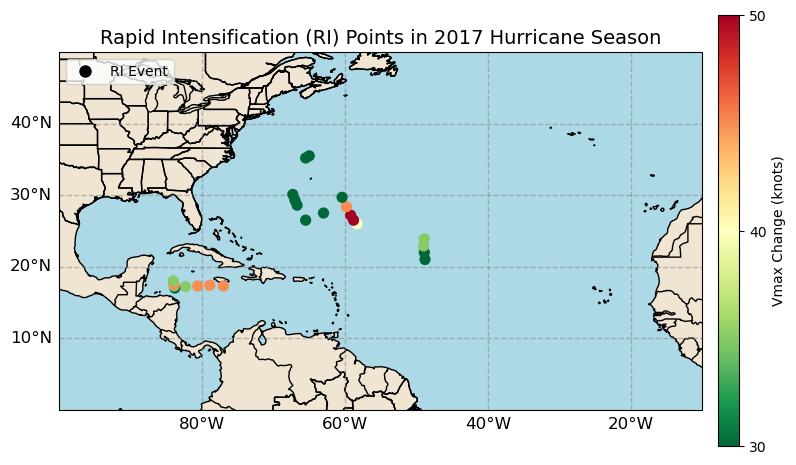

In [9]:
# Create a Cartopy map
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-100, -10, 0, 50], crs=ccrs.PlateCarree())

# Custom colors for land and ocean
land_color = '#f0e4d3'  # light beige
ocean_color = '#add8e6'  # light blue

# Add geographical features with custom colors
ax.add_feature(cfeature.LAND, facecolor=land_color)
ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='black')
colors = 'red'  # Example color setting

# Create the plot and scatter points
fig = plt.figure(figsize=(10, 8))
#ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# # Create a Cartopy map
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-100, -10, 0, 50], crs=ccrs.PlateCarree())

# Custom colors for land and ocean
land_color = '#f0e4d3'  # light beige
ocean_color = '#add8e6'  # light blue

# Add geographical features with custom colors
ax.add_feature(cfeature.LAND, facecolor=land_color)
ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='black')

# Plot the RI points with intensity color scale
sc = ax.scatter(RI_df['lon'], RI_df['lat'], c=RI_df['Vmax Change'], cmap='RdYlGn_r', s=50,
                transform=ccrs.PlateCarree(), label='RI Points', zorder=5)

# Add color bar
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.7, pad=0.02, cmap = 'RdYlGn')
cbar.set_label('Vmax Change (knots)')
cbar.set_ticks([30, 40, 50, 60, 70])  # Specify ticks for clarity

# Adjust the legend to show a black dot instead of red
legend_handle = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10)
plt.legend([legend_handle], ['RI Event'], loc='upper left')

# Add gridlines with labels (only left and bottom, no labels on top and right)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}
# Add a title
plt.title('Rapid Intensification (RI) Points in 2017 Hurricane Season', fontsize=14)

# Show the plot
plt.savefig('2017_RI_Hurricanes.png', dpi = 500)

#plt.show (dpi = 500)


